# Dataset visualisation and  cleaning

<div class="alert alert-block alert-success">
<b> Data cleaning </b> can be a tedious task. 
According to IBM Data Analytics you can expect to spend up to 80% of your time cleaning data. ok.
</div>

## Dataset description and visualisation

<div class="alert alert-block alert-success">
Data visualization is an essential aspect of data analysis that focuses on visually representing data. It provides a visual summary that aids in
processing and understanding information through images, maps, and graphs, simplifying observation, analysis, and comprehension. This is
particularly beneficial for large datasets, where manual processing can be tedious. Moreover, it helps highlight trends, patterns, and outliers.
Python offers a variety of libraries for data visualization, including Plotly, Matplotlib, and Seaborn.
</div>

<div class="alert alert-block alert-warning">Hepatitis is an inflammation of the liver. Most hepatitis patients are often asymptomatic. The Hepatitis dataset contains records of hepatitis cases in individuals and predicts patient survivability. For more details on this dataset, visit: https://archive.ics.
uci.edu/dataset/46/hepatitis <div>

<div class="alert alert-block alert-danger">
    
1. Import the Hepatitis dataset 
2. Print the first 10 samples
3. Print 3 random samples
4. Print the last 5 samples
5. Display the following information about the dataset: columns, number of missing values in each column, and the type of features, all in one instruction.
6. Display only the columns and their types (whether they are numerical or categorical).
7. Display the number of samples and features.
8. Display statistics for all numerical features: count, mean, standard deviation, quantiles, minimum, and maximum values.
9. Verify if the dataset is balanced using a count and a plot.
10. Using the pandas library, perform a line plot, histogram, and box plot for continuous values only. In the line plot, why is the line graph of the
feature ”protime” not continuous?
<div/>

First 10 samples:
   patient_id  class  age  sex  steroid  antivirals  fatigue  malaise  \
0           1      1   30    1      0.0           1      1.0      1.0   
1           2      1   50    0      0.0           1      0.0      1.0   
2           3      1   78    0      1.0           1      0.0      1.0   
3           4      1   31    0      NaN           0      1.0      1.0   
4           5      1   34    0      1.0           1      1.0      1.0   
5           6      1   34    0      1.0           1      1.0      1.0   
6           7      0   51    0      0.0           1      0.0      1.0   
7           8      1   23    0      1.0           1      1.0      1.0   
8           9      1   39    0      1.0           1      0.0      1.0   
9          10      1   30    0      1.0           1      1.0      1.0   

   anorexia  liver big  ...  spleen palpable  spiders  ascites  varices  \
0       1.0        0.0  ...              1.0      1.0      1.0      1.0   
1       1.0        0.0  ... 

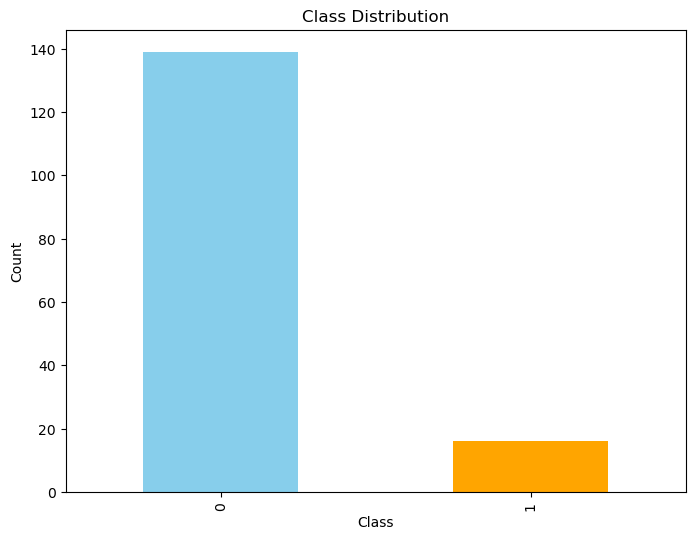

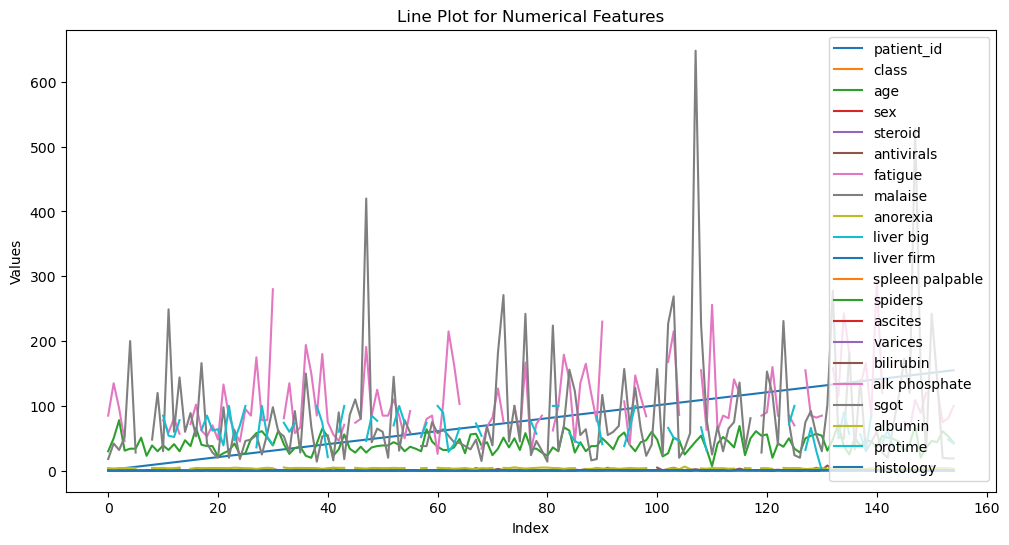

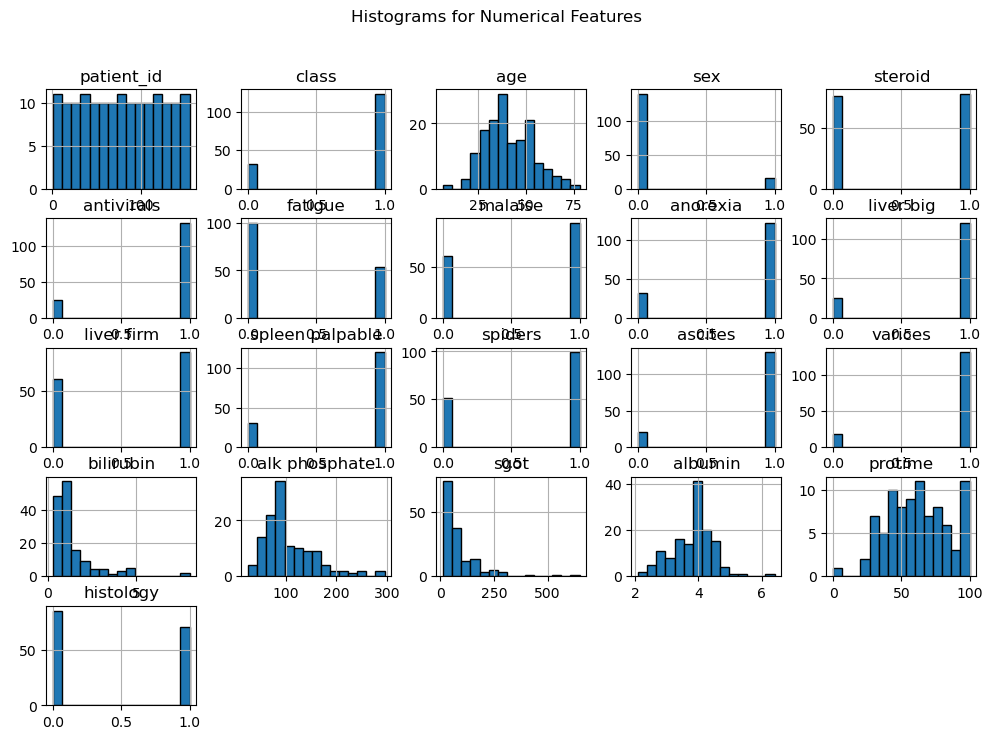

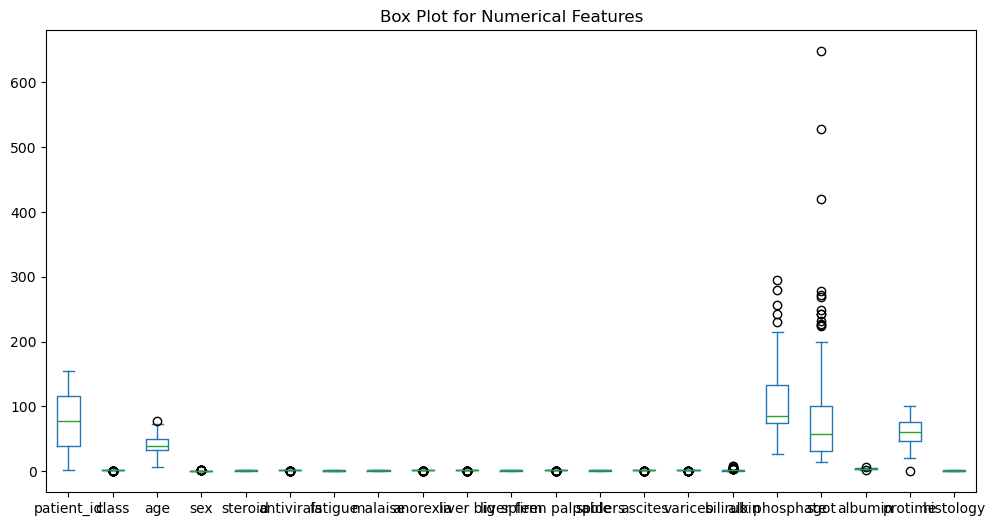

Index(['patient_id', 'class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue',
       'malaise', 'anorexia', 'liver big', 'liver firm', 'spleen palpable',
       'spiders', 'ascites', 'varices', 'bilirubin', 'alk phosphate', 'sgot',
       'albumin', 'protime', 'histology'],
      dtype='object')

Missing values in 'protime':
67


In [1]:
import pandas as pd

hepatitis_dataset_path = r'hepatitis.csv' 
data = pd.read_csv(hepatitis_dataset_path)

# Print the first 10 samples
print("First 10 samples:")
print(data.head(10))

# Print 3 random samples
print("\n3 random samples:")
print(data.sample(3))

# Print the last 5 samples
print("\nLast 5 samples:")
print(data.tail(5))

# ----------------------5 --------------------------------
# Display columns, missing values, and feature types in one instruction
print("\n5 Columns, Missing Values, and Feature Types:")
print(data.info(verbose = True))  

# ---------6-------------------------------------------------
# Display columns and their types (categorical or numerical)
print("\nColumns and Their Types:")
columns_types = data.dtypes.apply(lambda dtype: 'categorical' if dtype == 'object' else 'numerical')
print(columns_types)

# -----------------------7-------------------------------
# Display the number of samples (rows) and features (columns)
num_samples, num_features = data.shape
print(f"\nNumber of samples: {num_samples}, Number of features: {num_features}")

# ----------------------------8---------------------------
# Display statistics for all numerical features: count, mean, standard deviation, quantiles, minimum, and maximum values.
print("\nStatistics for Numerical Features:")
print(data.describe())

# ---------------------------9---------------------------
# Verify if the dataset is balanced using a count and a plot.
import matplotlib.pyplot as plt

# Assuming 'class' or 'target' is the column we want to check balance for
target_column = 'sex'  # Replace with the correct target column name

# Check the balance of the dataset by counting occurrences of each class
print("\n9- Class Distribution:")
print(data[target_column].value_counts())

# Plot the distribution of classes
plt.figure(figsize=(8,6))
data[target_column].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


# --------------10---------------------------

# Get only numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
# Line plot for continuous values
plt.figure(figsize=(12,6))
for column in numerical_columns:
    plt.plot(data.index, data[column], label=column)

plt.title('Line Plot for Numerical Features')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend(loc='upper right')
plt.show()

# ---------------
# Histogram for continuous values
data[numerical_columns].hist(figsize=(12, 8), bins=15, edgecolor='black')
plt.suptitle('Histograms for Numerical Features')
plt.show()

# -----------------
# Box plot for continuous values
data[numerical_columns].plot(kind='box', figsize=(12,6), title='Box Plot for Numerical Features')
plt.show()


print(data.columns)

# -----------------
# # Check for missing values in the 'protime' column
print("\nMissing values in 'protime':")
print(data['protime'].isnull().sum())

# # Fill missing values (if necessary) to make the line continuous
# # data['protime'] = data['protime'].fillna(method='ffill')  # Forward fill to make continuous



<b>A standard deviation (or σ) </b> is a measure of how dispersed the data is in relation to the mean.

<b> The median </b> is the middle value in a list ordered from smallest to largest.

<b> 25%, 50%, and 75% </b> present the Q1, Median, and Q3 values. 
![title](fig1.png)

## Dataset cleaning

<div class="alert alert-block alert-success">
Data cleaning is a crucial step in the machine learning process for optimal algorithm performance. It involves identifying and correcting issues such as missing values, duplicates, and irrelevant data to ensure accurate, consistent, high-quality, and error-free datasets. Common techniques used in data cleaning include handling missing values, removing duplicates, data type conversion, and outlier detection.
</div>

### Missing values

<div class="alert alert-block alert-success">
Handling missing data is a critical aspect of data preprocessing in machine learning. Effective strategies include imputing missing values
using statistical methods, removing records with missing values, or employing advanced imputation techniques. Each approach has its advantages and limitations, and choosing the right method is essential
for preventing biases and maintaining the integrity of analyses.
</div>

<div class="alert alert-block alert-danger"> 
    
1. Why is data missing? 
2. Print all samples that contain missing values.
3. Print features that contain missing values.
5. Print samples with features that contain missing values.
6. Identify the number of missing values in each feature.
7. Create a new dataframe from the first one and drop samples containing
missing values.
8. Create a new dataframe from the first one and delete columns contain-
ing missing values. Is deleting missing values a solution?
9. Replace missing values using the mean (for continuous values) or mode
(for categorical values) and print the number of missing values after
imputation.
<div/>

In [5]:
# 1 - ---
# Data entry errors
# Participants in the data collection may not have provided answers for all questions
# The feature might not apply to all rows

# 2 - ---
# Print all samples with missing values
missing_samples = data[data.isnull().any(axis=1)]
print("1- Samples with missing values:\n", missing_samples)

# 3 - ---
# Print features that have missing values
missing_features = data.columns[data.isnull().any()]
print("3- Features with missing values:\n", missing_features)


# 4 - -Print samples where specific features contain missing values
print("4- Samples with missing values in these features:\n", data[missing_features].isnull().sum())

#
# 5 - ---Count the number of missing values in each feature
missing_values_count = data.isnull().sum()
print("5- Number of missing values per feature:\n", missing_values_count)

# 
# 6 - ---Create a new dataframe by dropping rows with missing values
data_dropped_rows = data.dropna()

print(f"6- Original dataset had {data.shape[0]} rows.")
print(f"Dataset after dropping rows with missing values has {data_dropped_rows.shape[0]} rows.")

# 
# 7- Create a new dataframe by dropping columns with missing values
data_dropped_columns = data.dropna(axis=1)

print(f"7 -Original dataset had {data.shape[1]} columns.")
print(f"Dataset after dropping columns with missing values has {data_dropped_columns.shape[1]} columns.")

# Is deleting missing values a solution?
# - Deleting rows: If only a small percentage of the data is missing,
# dropping rows may not affect the dataset much. But if too many rows are deleted,
# it could result in losing valuable information.
# - Deleting columns: Deleting columns with missing values is
# a solution only if those features are not critical.
# But it can lead to losing important variables.

# 
# 8- Impute missing values: Replace missing continuous values with the mean and categorical with the mode
# for column in data.columns:
#     if data[column].dtype == 'float64' or data[column].dtype == 'int64':
#         data[column] = data[column].fillna(data[column].mean())  # No inplace, assign back to column
#     else:
#         data[column] = data[column].fillna(data[column].mode()[0])  # No inplace, assign back to column

# # Check the number of missing values after imputation
# missing_values_after_imputation = data.isnull().sum()
# print("Missing values after imputation:\n", missing_values_after_imputation)



Samples with missing values:
      patient_id  class  age  sex  steroid  antivirals  fatigue  malaise  \
0             1      1   30    1      0.0           1      1.0      1.0   
1             2      1   50    0      0.0           1      0.0      1.0   
2             3      1   78    0      1.0           1      0.0      1.0   
3             4      1   31    0      NaN           0      1.0      1.0   
4             5      1   34    0      1.0           1      1.0      1.0   
..          ...    ...  ...  ...      ...         ...      ...      ...   
148         149      1   20    0      0.0           1      1.0      1.0   
149         150      1   36    0      1.0           1      1.0      1.0   
150         151      0   46    0      1.0           1      0.0      0.0   
151         152      1   44    0      1.0           1      0.0      1.0   
152         153      1   61    0      0.0           1      0.0      0.0   

     anorexia  liver big  ...  spleen palpable  spiders  ascites  var